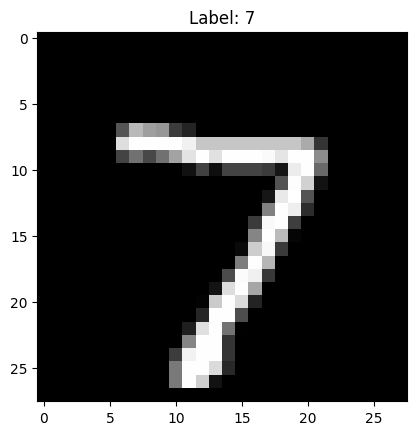

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0  

# Define model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D (784)
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])

# Display an example image
plt.imshow(X_test[0], cmap='gray')  # No need to reshape, already (28,28)
plt.title(f"Label: {y_test[0]}")
plt.show()


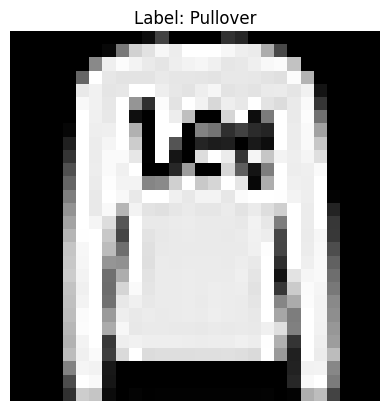

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0  

# Class labels for Fashion MNIST
class_labels = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Define model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D (784)
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (clothing items)
])

# Display an example image
plt.imshow(X_test[1], cmap='gray')  # No need to reshape, already (28,28)
plt.title(f"Label: {class_labels[y_test[1]]}")
plt.axis('off')
plt.show()


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7754 - loss: 0.6512 - val_accuracy: 0.8359 - val_loss: 0.4419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8569 - loss: 0.3986 - val_accuracy: 0.8699 - val_loss: 0.3625
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8733 - loss: 0.3480 - val_accuracy: 0.8600 - val_loss: 0.3827
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8837 - loss: 0.3206 - val_accuracy: 0.8752 - val_loss: 0.3493
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8874 - loss: 0.2990 - val_accuracy: 0.8703 - val_loss: 0.3533
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8941 - loss: 0.2877 - val_accuracy: 0.8883 - val_loss: 0.3234
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9032 - loss: 0.2667 - val_accuracy: 0.8882 - val_loss: 0.3193
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9045 - loss: 0.2547 -

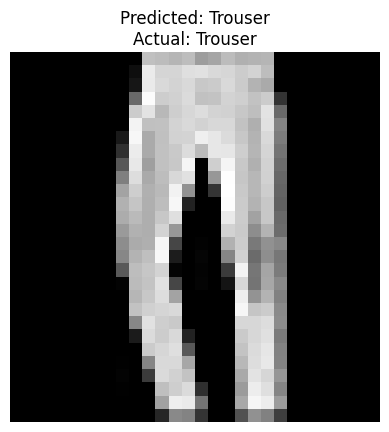

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0  

# Class labels for Fashion MNIST
class_labels = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Define model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D (784)
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes (clothing items)
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2%}")

# Make predictions on test images
predictions = model.predict(X_test)

# Function to display image with predicted and actual label
def display_prediction(image_index):
    predicted_class = np.argmax(predictions[image_index])
    true_class = y_test[image_index]

    plt.imshow(X_test[image_index], cmap='gray')
    plt.title(f"Predicted: {class_labels[predicted_class]}\nActual: {class_labels[true_class]}")
    plt.axis('off')
    plt.show()

# Display an example prediction
display_prediction(5)  # Change index to see different results
